In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
import seaborn as sns
import scipy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Generate prediction score and prototype model

In [ ]:
import json
# load and preview the data
business_data = []
with open('/content/drive/MyDrive/yelp_academic_dataset_review.json','rb') as f:
    import json
    for line in f:
        business_data.append(json.loads(line))
df = pd.DataFrame.from_dict(business_data)
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
df[['funny','text']]

,funny,text
0,0,"If you decide to eat here, just be aware it is..."
1,0,I've taken a lot of spin classes over the year...
2,0,Family diner. Had the buffet. Eclectic assortm...
3,0,"Wow! Yummy, different, delicious. Our favo..."
4,0,Cute interior and owner (?) gave us tour of up...
...,...,...
6990275,2,Latest addition to services from ICCU is Apple...
6990276,1,"This spot offers a great, affordable east week..."
6990277,0,This Home Depot won me over when I needed to g...
6990278,0,For when I'm feeling like ignoring my calorie-...


In [ ]:
df[['useful','text']]

,useful,text
0,0,"If you decide to eat here, just be aware it is..."
1,1,I've taken a lot of spin classes over the year...
2,0,Family diner. Had the buffet. Eclectic assortm...
3,1,"Wow! Yummy, different, delicious. Our favo..."
4,1,Cute interior and owner (?) gave us tour of up...
...,...,...
6990275,1,Latest addition to services from ICCU is Apple...
6990276,2,"This spot offers a great, affordable east week..."
6990277,1,This Home Depot won me over when I needed to g...
6990278,1,For when I'm feeling like ignoring my calorie-...


In [ ]:
df[['cool','text']]

,cool,text
0,0,"If you decide to eat here, just be aware it is..."
1,1,I've taken a lot of spin classes over the year...
2,0,Family diner. Had the buffet. Eclectic assortm...
3,1,"Wow! Yummy, different, delicious. Our favo..."
4,1,Cute interior and owner (?) gave us tour of up...
...,...,...
6990275,1,Latest addition to services from ICCU is Apple...
6990276,1,"This spot offers a great, affordable east week..."
6990277,0,This Home Depot won me over when I needed to g...
6990278,0,For when I'm feeling like ignoring my calorie-...


In [ ]:
cool = df['cool']
cool=[ 0 if cool < 1 else 1 for cool in cool ]
df['cool'] = cool
df['cool']

0          0
1          1
2          0
3          1
4          1
          ..
6990275    1
6990276    1
6990277    0
6990278    0
6990279    1
Name: cool, Length: 6990280, dtype: int64

In [ ]:
funny = df['funny']
funny=[ 0 if funny < 1 else 1 for funny in funny ]
df['funny'] = funny
df['funny']

0          0
1          0
2          0
3          0
4          0
          ..
6990275    1
6990276    1
6990277    0
6990278    0
6990279    1
Name: funny, Length: 6990280, dtype: int64

In [ ]:
useful = df['useful']
useful=[ 0 if useful < 1 else 1 for useful in useful ]
df['useful'] = useful
df['useful']

0          0
1          1
2          0
3          1
4          1
          ..
6990275    1
6990276    1
6990277    1
6990278    1
6990279    1
Name: useful, Length: 6990280, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=None)
from keras.preprocessing.text import Tokenizer

text1='some thing to eat'
text2='some thing to drink'
texts=[text1,text2]

tokenizer = Tokenizer(num_words=None)
#num_words:None or int,the max word can process.
tokenizer.fit_on_texts(texts)

# row number=num_words
#Get word index
print( tokenizer.texts_to_sequences(texts))
#Matrix = one-hot
print( tokenizer.texts_to_matrix(texts))

[[1, 2, 3, 4], [1, 2, 3, 5]]
[[0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0. 1.]]


In [ ]:
#Transfer to word bag, max_document_length is the max length of review
from keras_preprocessing.sequence import pad_sequences
max_document_length=200
max_features = 50000
#Set the word number of wordbag
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
text = df['text']
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
 #pad the sequences 如果这里运行成功，就把下面的放上来
x=pad_sequences(sequences, maxlen=max_document_length)

In [ ]:
df[['cool','text']]
text = df['text']
labelsForcool = df['cool']

In [ ]:
df[['funny','text']]
text = df['text']
labelsForfunny = df['funny']

In [ ]:
df[['useful','text']]
text = df['text']
labelsForuseful = df['useful']

In [ ]:
#80% of whole dataset
training_size = 5550000
training_text = sequences[0:training_size]
testing_text = sequences[training_size:]
training_padded = x[0:training_size]
testing_padded = x[training_size:]
training_labels = labelsForcool[0:training_size]
testing_labels = labelsForcool[training_size:]

In [ ]:
vocab_size = 50000
embedding_dim = 16
max_length = 200
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           800000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 800,433
Trainable params: 800,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
173438/173438 - 824s - loss: 0.4835 - accuracy: 0.7837 - val_loss: 0.4841 - val_accuracy: 0.7827 - 824s/epoch - 5ms/step
Epoch 2/10
173438/173438 - 824s - loss: 0.4787 - accuracy: 0.7865 - val_loss: 0.4822 - val_accuracy: 0.7833 - 824s/epoch - 5ms/step
Epoch 3/10
173438/173438 - 814s - loss: 0.4760 - accuracy: 0.7882 - val_loss: 0.4822 - val_accuracy: 0.7835 - 814s/epoch - 5ms/step
Epoch 4/10
173438/173438 - 826s - loss: 0.4739 - accuracy: 0.7895 - val_loss: 0.4835 - val_accuracy: 0.7828 - 826s/epoch - 5ms/step
Epoch 5/10
173438/173438 - 826s - loss: 0.4720 - accuracy: 0.7908 - val_loss: 0.4831 - val_accuracy: 0.7829 - 826s/epoch - 5ms/step
Epoch 6/10
173438/173438 - 830s - loss: 0.4703 - accuracy: 0.7919 - val_loss: 0.4845 - val_accuracy: 0.7829 - 830s/epoch - 5ms/step
Epoch 7/10
173438/173438 - 820s - loss: 0.4685 - accuracy: 0.7932 - val_loss: 0.4857 - val_accuracy: 0.7822 - 820s/epoch - 5ms/step
Epoch 8/10
173438/173438 - 823s - loss: 0.4668 - accuracy: 0.7943 - val_loss

In [ ]:
model.summary()
sentence = ["I love this place", "This place offer great stake and taste like","This cozy restaurant has left the best impressions!"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length)
s=(model.predict(testing_padded))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           800000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 800,433
Trainable params: 800,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.savetxt("cool.csv", s, delimiter=",")

In [ ]:
#* Colab code that failed to run , noneed to run this part
#from keras_preprocessing.sequence import pad_sequences
##trunc_type='post'
#padding_type='post'
#max_document_length=200
#max_features = 50000
#tokenizer = Tokenizer(num_words=max_features)
##tokenizer.fit_on_texts(training_text)
#tokenizer.fit_on_texts(testing_text)

#word_index = tokenizer.word_index

#training_text = tokenizer.texts_to_sequences(training_text)
#training_padded = pad_sequences(training_text, maxlen=max_document_length,padding=padding_type,truncating=trunc_type)

#testing_sequences = tokenizer.texts_to_sequences(testing_text)
#testing_padded = pad_sequences(testing_text, maxlen=max_document_length,padding=padding_type,truncating=trunc_type)
#print("success!")

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analyze the corelation

In [ ]:
cool = pd.read_csv("/content/drive/MyDrive/cool.csv",header=None)
funny = pd.read_csv("/content/drive/MyDrive/funny.csv",header=None)
useful = pd.read_csv("/content/drive/MyDrive/useful.csv",header=None)

,0
0,0.388870
1,0.193126
2,0.310730
3,0.776828
4,0.370124
...,...
1440275,0.619357
1440276,0.661109
1440277,0.743625
1440278,0.921414


In [ ]:
predictdata = pd.concat([cool,funny, useful], axis=1, join='inner')
predictdata = predictdata.set_axis(["cool","funny","useful"], axis=1)
predictdata.corr(method ='pearson')

,cool,funny,useful
cool,1.000000,0.631968,0.634245
funny,0.631968,1.000000,0.672960
useful,0.634245,0.672960,1.000000


In [ ]:
Original = df[['cool','funny','useful']]
Original .corr(method ='pearson')

,cool,funny,useful
cool,1.000000,0.607310,0.718529
funny,0.607310,1.000000,0.511803
useful,0.718529,0.511803,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


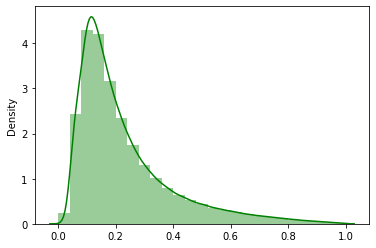

In [ ]:
fig, ax = plt.subplots()
sns.distplot(cool, bins=25, color="g", ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


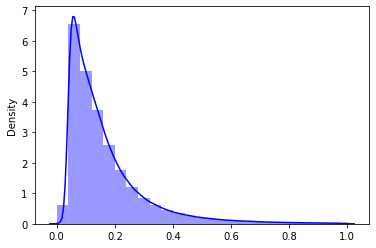

In [ ]:
fig, ax = plt.subplots()
sns.distplot(funny, bins=25, color="b", ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


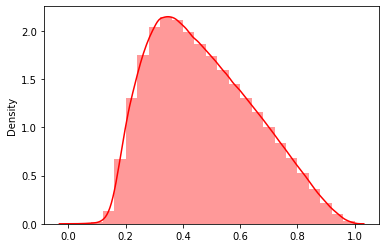

In [ ]:
fig, ax = plt.subplots()
sns.distplot(useful, bins=25, color="r", ax=ax)
plt.show()